<a href="https://colab.research.google.com/github/git-bauerseb/deep-learning/blob/main/generative_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

# Functional API :: freedom over design of deep network

from keras.layers import Input, Flatten, Dense
from keras.models import Model


input_layer = Input(shape=(32,32,3))
x = Flatten()(input_layer)

x = Dense(units=200, activation='relu')(x)
x = Dense(units=150, activation='relu')(x)

output_layer = Dense(units=10, activation='softmax')(x)

'''
Also possible:

x = Dense(units=200)(x)
x = Activation('relu')(x)
'''

model = Model(input_layer, output_layer)
model.summary()

170508288/170498071 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = tf.keras.optimizers.Adam(lr=.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True
)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8403 - accuracy: 0.3367
Epoch 2/10
 463/1563 [=======>......................] - ETA: 7s - loss: 1.6953 - accuracy: 0.3955

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=.4, wspace=.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(.5, -.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.text(.5, -.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.imshow(img)

In [ ]:
input_layer = Input(shape=(64,64,1))

conv_layer_1 = Conv2D(
    filters = 2,
    kernel_size = (3,3),
    strides = 1,
    padding = 'same'
)(input_layer)

In [ ]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = tf.keras.layers.Conv2D(
    filters = 10,
    kernel_size = (4,4),
    strides = 2,
    padding = 'same'
)(input_layer)

conv_layer_2 = tf.keras.layers.Conv2D(
    filters = 20,
    kernel_size = (3,3),
    strides = 2,
    padding = 'same'
)(conv_layer_1)

flatten_layer =  tf.keras.layers.Flatten()(conv_layer_2)

output_layer =  tf.keras.layers.Dense(units=10, activation='softmax')(flatten_layer)

model = Model(input_layer, output_layer)
model.summary()

In [ ]:
# CNN on CIFAR-10

import tensorflow as tf

NUM_CLASSES = 10

# 32x32 images with R,G,B
input_layer = tf.keras.layers.Input((32,32,3))

# First convolution layer
# 32 3x3 kernels
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)

# Second convolutional layer
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)

# Third convolutional layer
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)

# Fourth convolutional layer
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)


x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = tf.keras.layers.Dropout(rate=.5)(x)

x = tf.keras.layers.Dense(NUM_CLASSES)(x)
output_layer = tf.keras.layers.Activation('softmax')(x)

model = tf.keras.Model(input_layer, output_layer)


model.compile(tf.keras.optimizers.Adam(learning_rate=.01), tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])


model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test)
)


NameError: ignored

In [ ]:
model.evaluate(x_test, y_test, batch_size=1000)

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt


indices = np.random.choice(range(len(x_test)), 10)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=.4, wspace=.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, 10, i+1)

  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)

  ax.imshow(img)

In [ ]:
from keras.callbacks import Callback, LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt
import os

#### CALLBACKS
class CustomCallback(Callback):
    
    def __init__(self, run_folder, print_every_n_batches, initial_epoch, vae):
        self.epoch = initial_epoch
        self.run_folder = run_folder
        self.print_every_n_batches = print_every_n_batches
        self.vae = vae

    def on_batch_end(self, batch, logs={}):
        if batch % self.print_every_n_batches == 0:
            z_new = np.random.normal(size = (1,self.vae.z_dim))
            reconst = self.vae.decoder.predict(np.array(z_new))[0].squeeze()

            filepath = os.path.join(self.run_folder, 'images', 'img_' + str(self.epoch).zfill(3) + '_' + str(batch) + '.jpg')
            if len(reconst.shape) == 2:
                plt.imsave(filepath, reconst, cmap='gray_r')
            else:
                plt.imsave(filepath, reconst)

                
    def on_epoch_begin(self, epoch, logs={}):
        self.epoch += 1



def step_decay_schedule(initial_lr, decay_factor=0.5, step_size=1):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''
    def schedule(epoch):
        new_lr = initial_lr * (decay_factor ** np.floor(epoch/step_size))
        
        return new_lr

    return LearningRateScheduler(schedule)

In [ ]:
# Variational autoencoders

from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model

from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

class Autoencoder():

  def __init__(self,
      input_dim,
      encoder_conv_filters,
      encoder_conv_kernel_size,
      encoder_conv_strides,
      decoder_conv_t_filters,
      decoder_conv_t_kernel_size,
      decoder_conv_t_strides,
      z_dim,
      use_batch_norm=False,
      use_dropout=False
  ):
    self.name = 'autoencoder'

    self.input_dim = input_dim
    self.encoder_conv_filters = encoder_conv_filters
    self.encoder_conv_kernel_size = encoder_conv_kernel_size
    self.encoder_conv_strides = encoder_conv_strides
    self.decoder_conv_t_filters = decoder_conv_t_filters
    self.decoder_conv_t_kernel_size = decoder_conv_t_kernel_size
    self.decoder_conv_t_strides = decoder_conv_t_strides
    self.z_dim = z_dim

    self.use_batch_norm = use_batch_norm
    self.use_dropout = use_dropout

    self.n_layers_encoder = len(encoder_conv_filters)
    self.n_layers_decoder = len(decoder_conv_t_filters)

    self.build()
    self.model.summary()

  def build(self):

    ### THE ENCODER
    encoder_input = Input(shape=self.input_dim, name='encoder_input')

    x = encoder_input

    for i in range(self.n_layers_encoder):
        conv_layer = Conv2D(
            filters = self.encoder_conv_filters[i]
            , kernel_size = self.encoder_conv_kernel_size[i]
            , strides = self.encoder_conv_strides[i]
            , padding = 'same'
            , name = 'encoder_conv_' + str(i)
            )

        x = conv_layer(x)

        x = LeakyReLU()(x)

        if self.use_batch_norm:
            x = BatchNormalization()(x)

        if self.use_dropout:
            x = Dropout(rate = 0.25)(x)

    shape_before_flattening = K.int_shape(x)[1:]

    x = Flatten()(x)
    encoder_output= Dense(self.z_dim, name='encoder_output')(x)

    self.encoder = Model(encoder_input, encoder_output)


    ### THE DECODER
    decoder_input = Input(shape=(self.z_dim,), name='decoder_input')

    x = Dense(np.prod(shape_before_flattening))(decoder_input)
    x = Reshape(shape_before_flattening)(x)

    for i in range(self.n_layers_decoder):
        conv_t_layer = Conv2DTranspose(
            filters = self.decoder_conv_t_filters[i]
            , kernel_size = self.decoder_conv_t_kernel_size[i]
            , strides = self.decoder_conv_t_strides[i]
            , padding = 'same'
            , name = 'decoder_conv_t_' + str(i)
            )

        x = conv_t_layer(x)

        if i < self.n_layers_decoder - 1:
            x = LeakyReLU()(x)
            
            if self.use_batch_norm:
                x = BatchNormalization()(x)
            
            if self.use_dropout:
                x = Dropout(rate = 0.25)(x)
        else:
            x = Activation('sigmoid')(x)

    decoder_output = x

    self.decoder = Model(decoder_input, decoder_output)

    ### THE FULL AUTOENCODER
    model_input = encoder_input
    model_output = self.decoder(encoder_output)

    self.model = Model(model_input, model_output)

  def compile(self, learning_rate):
    self.learning_rate = learning_rate

    optimizer = Adam(lr=learning_rate)

    def r_loss(y_true, y_pred):
      return K.mean(K.square(y_true - y_pred), axis=[1,2,3])

    self.model.compile(optimizer=optimizer, loss=r_loss)


  def train(self, x_train, batch_size, epochs, run_folder, print_every_n_batches=100, initial_epoch = 0, lr_decay = 1):
    custom_callback = CustomCallback(run_folder, print_every_n_batches, initial_epoch, self)

    lr_sched = step_decay_schedule(initial_lr=self.learning_rate, decay_factor=lr_decay, step_size=1)

    checkpoint2 = ModelCheckpoint(os.path.join(run_folder, 'weights/weights.h5'), save_weights_only = True, verbose=1)

    callbacks_list = [checkpoint2, custom_callback, lr_sched]

    self.model.fit(
        x_train,
        x_train,
        batch_size=batch_size,
        shuffle=True,
        epochs=epochs,
        initial_epoch=initial_epoch,
        callbacks=callbacks_list
    )

In [ ]:
AE = Autoencoder(input_dim = (28,28,1)
, encoder_conv_filters = [32,64,64, 64]
, encoder_conv_kernel_size = [3,3,3,3]
, encoder_conv_strides = [1,2,2,1]
, decoder_conv_t_filters = [64,64,32,1]
, decoder_conv_t_kernel_size = [3,3,3,3]
, decoder_conv_t_strides = [1,2,2,1]
, z_dim = 2)

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder_conv_0 (Conv2D)      (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 7, 7, 64)          0  

In [ ]:
# Load MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape + (1,))


AE.compile(0.0005)


# Folder

# run params
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

MODE =  'build' #'load' #


AE.train(
    x_train,
    batch_size=32,
    epochs=1,
    run_folder=RUN_FOLDER,
    initial_epoch=0
)




/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1875/1875 [==============================] - 21s 11ms/step - loss: 0.1120

Epoch 00001: saving model to run/vae/0001_digits/weights/weights.h5


In [1]:
## VARIATIONAL AUTOENCODER

import numpy as np

from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.utils import plot_model

class VariationalAutoencoder():
  '''
    Implements a variational autoencoder with a gaussian
    prior on latent factors.
  '''

  def __init__(
      self,
      input_dim,
      encoder_conv_filters,
      encoder_conv_kernel_size,
      encoder_conv_strides,
      decoder_conv_t_filters,
      decoder_conv_t_kernel_size,
      decoder_conv_t_strides,
      z_dim,
      use_batch_norm=False,
      use_dropout=False
  ):

    self.name = 'variational_autoencoder'
    self.input_dim = input_dim
    self.encoder_conv_filters = encoder_conv_filters
    self.encoder_conv_kernel_size = encoder_conv_kernel_size
    self.encoder_conv_strides = encoder_conv_strides
    
    self.decoder_conv_t_filters = decoder_conv_t_filters
    self.decoder_conv_t_kernel_size = decoder_conv_t_kernel_size
    self.decoder_conv_t_strides = decoder_conv_t_strides

    self.z_dim = z_dim
    self.use_batch_norm = use_batch_norm
    self.use_dropout = use_dropout

    self.n_layers_encoder = len(encoder_conv_filters)
    self.n_layers_decoder = len(decoder_conv_t_filters)

    self._build()


  def _build(self):
    
    ### THE ENCODER
    encoder_input = Input(shape=self.input_dim, name='encoder_input')

    x = encoder_input

    for i in range(self.n_layers_encoder):
        conv_layer = Conv2D(
            filters = self.encoder_conv_filters[i]
            , kernel_size = self.encoder_conv_kernel_size[i]
            , strides = self.encoder_conv_strides[i]
            , padding = 'same'
            , name = 'encoder_conv_' + str(i)
            )

        x = conv_layer(x)

        if self.use_batch_norm:
            x = BatchNormalization()(x)

        x = LeakyReLU()(x)

        if self.use_dropout:
            x = Dropout(rate = 0.25)(x)

    shape_before_flattening = K.int_shape(x)[1:]

    x = Flatten()(x)
    self.mu = Dense(self.z_dim, name='mu')(x)
    self.log_var = Dense(self.z_dim, name='log_var')(x)

    self.encoder_mu_log_var = Model(encoder_input, (self.mu, self.log_var))

    def sampling(args):
        mu, log_var = args
        epsilon = K.random_normal(shape=K.shape(mu), mean=0., stddev=1.)
        return mu + K.exp(log_var / 2) * epsilon

    encoder_output = Lambda(sampling, name='encoder_output')([self.mu, self.log_var])

    self.encoder = Model(encoder_input, encoder_output)
    
    

    ### THE DECODER

    decoder_input = Input(shape=(self.z_dim,), name='decoder_input')

    x = Dense(np.prod(shape_before_flattening))(decoder_input)
    x = Reshape(shape_before_flattening)(x)

    for i in range(self.n_layers_decoder):
        conv_t_layer = Conv2DTranspose(
            filters = self.decoder_conv_t_filters[i]
            , kernel_size = self.decoder_conv_t_kernel_size[i]
            , strides = self.decoder_conv_t_strides[i]
            , padding = 'same'
            , name = 'decoder_conv_t_' + str(i)
            )

        x = conv_t_layer(x)

        if i < self.n_layers_decoder - 1:
            if self.use_batch_norm:
                x = BatchNormalization()(x)
            x = LeakyReLU()(x)
            if self.use_dropout:
                x = Dropout(rate = 0.25)(x)
        else:
            x = Activation('sigmoid')(x)

        

    decoder_output = x

    self.decoder = Model(decoder_input, decoder_output)

    ### THE FULL VAE
    model_input = encoder_input
    model_output = self.decoder(encoder_output)

    self.model = Model(model_input, model_output)


  def compile(self, learning_rate, r_loss_factor):
      def vae_r_loss(y_true, y_pred):
        r_loss = K.mean(K.square(y_true - y_pred), axis=[1,2,3])
        return r_loss_factor * r_loss

      def vae_kl_loss(y_true, y_pred):
        '''
          Berechnet die Kullback-Leibler Divergenz zwischen dem
          vorhergesagtem Wert und dem ursprünglichen Wert.

          Da es sich um Gauß-Verteilungen handelt, hat die KL-Divergenz die Form:

          DL(p,q) = 1/2 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
        '''
        kl_loss = -.5 * K.sum(1 + self.log_var - K.square(self.mu) - K.exp(self.log_var), axis=1)
        return kl_loss

      def vae_loss(y_true, y_pred):
        r_loss = vae_r_loss(y_true, y_pred)
        kl_loss = vae_kl_loss(y_true, y_pred)
        return r_loss + kl_loss

      optimizer = Adam(learning_rate=learning_rate)
      self.model.compile(optimizer=optimizer, loss=vae_loss, metrics=[vae_r_loss, vae_kl_loss])


  def train(self, x_train, batch_size, epochs, lr_decay=1):
    self.model.fit(
        x_train,
        x_train,
        batch_size=batch_size,
        shuffle=True,
        epochs=epochs
    )

In [3]:
from tensorflow.keras.datasets import mnist

from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

def load_data():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  x_train = x_train.astype('float32') / 255.
  x_train = x_train.reshape(x_train.shape + (1,))
  x_test = x_test.astype('float32') / 255.
  x_test = x_test.reshape(x_test.shape + (1,))

  return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data()


# Define model
vae = VariationalAutoencoder(
    input_dim=(28,28,1),
    encoder_conv_filters=[32,64,64,64],
    encoder_conv_kernel_size=[3,3,3,3],
    encoder_conv_strides=[1,2,2,1],
    decoder_conv_t_filters=[64,64,32,1],
    decoder_conv_t_kernel_size=[3,3,3,3],
    decoder_conv_t_strides=[1,2,2,1],
    z_dim=2,
    use_dropout=True,
    use_batch_norm=True
    )

# Compile
vae.compile(.01, 1)

vae.model.summary()

BATCH_SIZE = 32
EPOCHS = 2

# Train
vae.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
)

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
encoder_conv_0 (Conv2D)         (None, 28, 28, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
batch_normalization_7 (BatchNor (None, 28, 28, 32)   128         encoder_conv_0[0][0]             
__________________________________________________________________________________________________
leaky_re_lu_7 (LeakyReLU)       (None, 28, 28, 32)   0           batch_normalization_7[0][0]      
____________________________________________________________________________________________

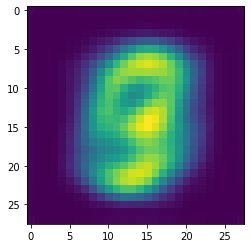

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(x_test[0,:,:,0])

latent_vars_pred = vae.encoder.predict(x_test[:32], batch_size=32)

reconstructed_imgs = vae.decoder.predict(latent_vars_pred, batch_size=32)

plt.imshow(reconstructed_imgs[6,:,:,0])